In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
titanic = pd.read_csv("/content/train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


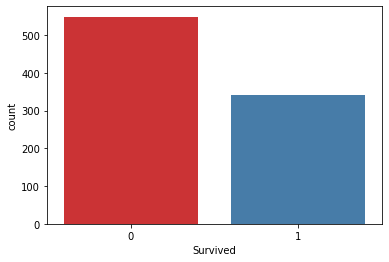

In [3]:
sns.countplot(x='Survived', data=titanic, palette='Set1')
plt.show()

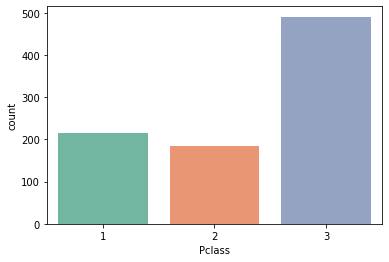

In [4]:
sns.countplot(x='Pclass', data=titanic, palette='Set2')
plt.show()

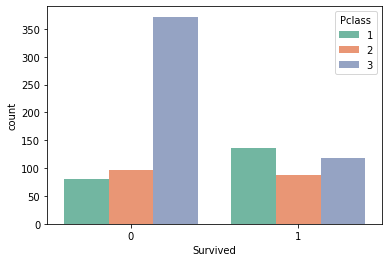

In [5]:
sns.countplot(x='Survived', hue='Pclass', data=titanic, palette='Set2')

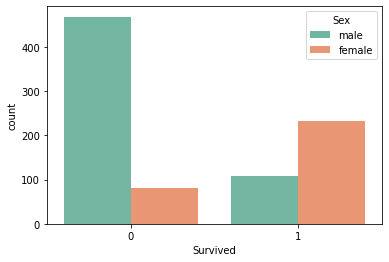

In [6]:
sns.countplot(x='Survived', hue='Sex', data=titanic, palette='Set2')

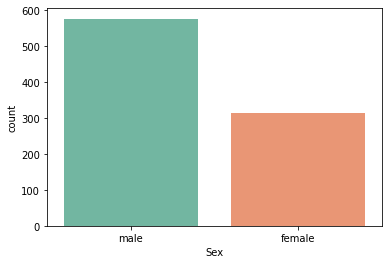

In [7]:
sns.countplot(x='Sex', data=titanic, palette='Set2')
plt.show()

In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


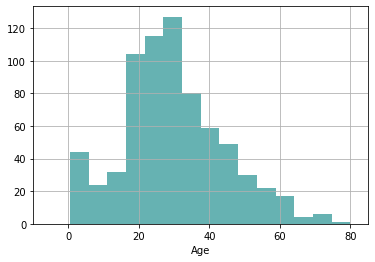

Mean of age=  29.69911764705882
Median of age=  28.0


In [10]:
ax = titanic['Age'].hist(bins=15, color='teal', alpha=0.6)
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()
age_mean= titanic['Age'].mean()
age_median= titanic['Age']. median()
print("Mean of age= ", age_mean)
print("Median of age= ", age_median)

In [11]:
titanic_median_age= titanic.copy()
titanic_median_age['Age'].fillna(age_median, inplace= True)

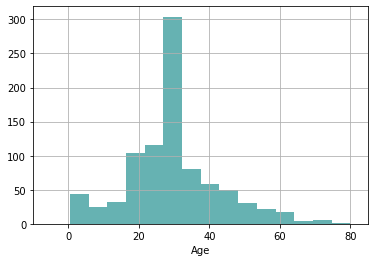

Mean of age=  29.36158249158249
Median of age=  28.0


In [12]:
ax = titanic_median_age['Age'].hist(bins=15, color='teal', alpha=0.6)
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()
age_mean= titanic_median_age['Age'].mean()
age_median= titanic_median_age['Age']. median()
print("Mean of age= ", age_mean)
print("Median of age= ", age_median)

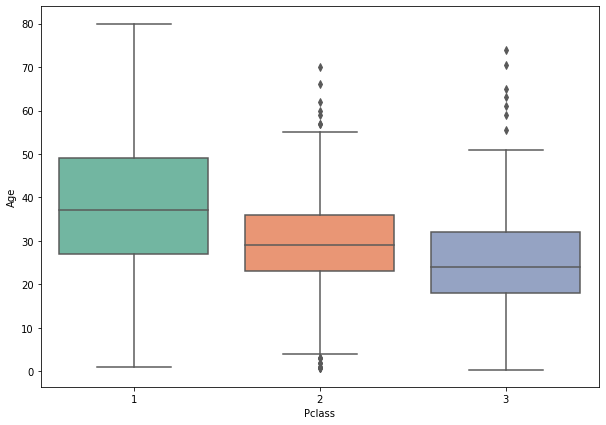

In [13]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=titanic, palette='Set2')

In [14]:
def get_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        condition= titanic['Pclass'] == Pclass
        return int(titanic[condition]['Age'].median())
    else:
        return Age

In [15]:
#Apply a function along an axis of the DataFrame.
titanic['Age'] = titanic[['Age', 'Pclass']].apply(get_age,axis=1)

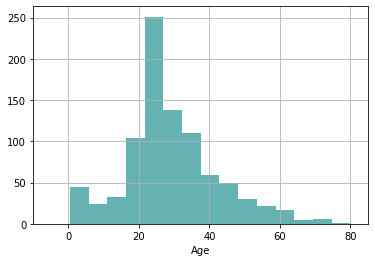

Mean of age=  29.06640852974186
Median of age=  26.0


In [16]:
ax = titanic['Age'].hist(bins=15, color='teal', alpha=0.6)
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()
age_mean= titanic['Age'].mean()
age_median= titanic['Age']. median()
print("Mean of age= ", age_mean)
print("Median of age= ", age_median)

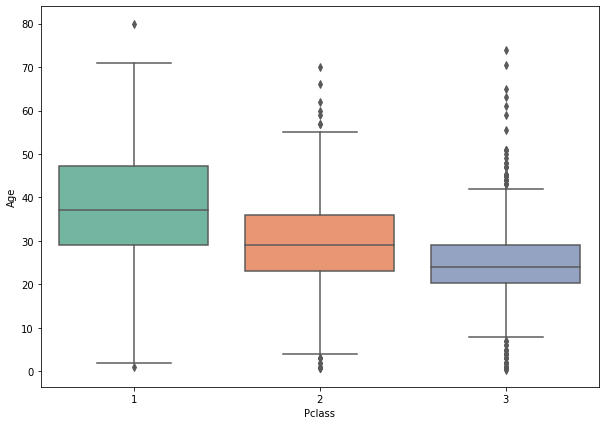

In [17]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=titanic, palette='Set2')

In [18]:
titanic.drop('Cabin', axis=1, inplace=True)

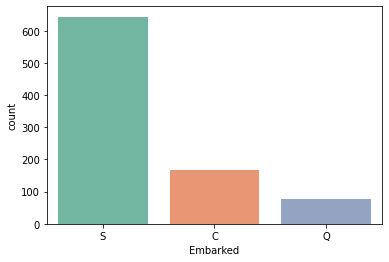

In [19]:
sns.countplot(x='Embarked', data=titanic, palette='Set2')
plt.show()

In [20]:
titanic['Embarked'].fillna('S', inplace=True)

In [21]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
titanic.drop(['PassengerId', 'Name','Ticket','Fare'],inplace=True,axis=1)

In [24]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [25]:
titanic=pd.get_dummies(titanic, columns=["Embarked", "Sex"])
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,1,0,0,0,1,0,1
1,1,1,38.0,1,0,1,0,0,1,0
2,1,3,26.0,0,0,0,0,1,1,0
3,1,1,35.0,1,0,0,0,1,1,0
4,0,3,35.0,0,0,0,0,1,0,1


In [26]:
titanic.corr()['Survived']

Survived      1.000000
Pclass       -0.338481
Age          -0.047255
SibSp        -0.035322
Parch         0.081629
Embarked_C    0.168240
Embarked_Q    0.003650
Embarked_S   -0.149683
Sex_female    0.543351
Sex_male     -0.543351
Name: Survived, dtype: float64

In [27]:
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [28]:
model = LogisticRegression(max_iter= 300)
model.fit(X_train,y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

print(accuracy_score(y_train, train_predictions))
print(accuracy_score(y_test, test_predictions))

0.8138041733547352
0.7910447761194029


In [32]:
confusion_matrix(y_test, test_predictions)

array([[135,  19],
       [ 37,  77]])

In [34]:
precision_score(y_test, test_predictions)

0.8020833333333334

In [35]:
recall_score(y_test, test_predictions)

0.6754385964912281

In [37]:
f1_score(y_test, test_predictions)

0.7333333333333333

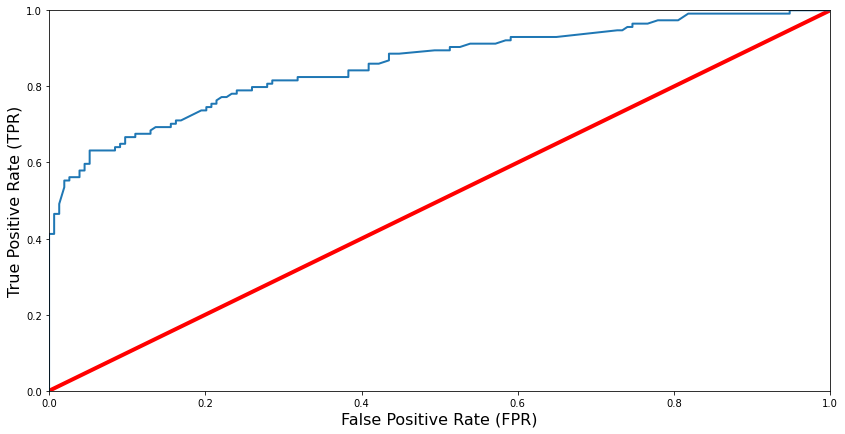

In [44]:
logreg_prob= model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, logreg_prob)
def plot_roc_curve(false_positive_rate, true_positive_rate):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
plt.figure(figsize=(14, 7))
plt.plot([0, 1], [0, 1], 'r', linewidth=4)

plot_roc_curve(false_positive_rate, true_positive_rate)

In [45]:
r_a_score = roc_auc_score(y_test, logreg_prob)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.8558327637275006
